<a href="https://colab.research.google.com/github/epicTommy/cs101_python_soccer/blob/main/101pythonsoccer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2018/2019 Champions League Tottenham Vs Hotspur Game Analysis

Imports and Installations

In [ ]:
pip install statsbombpy

In [ ]:
pip install mplsoccer

In [ ]:
from statsbombpy import sb
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

Acessing the Tottenham vs Liverpool game

In [ ]:
sb.matches(competition_id = 16,season_id = 4)

credentials were not supplied. open data access only


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
0,22912,2019-06-01,21:00:00.000,Europe - Champions League,2018/2019,Tottenham Hotspur,Liverpool,0,2,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,13,Final,Estadio Wanda Metropolitano (Madrid),Damir Skomina,1.1.0,2,2


In [ ]:
game = sb.events(match_id=22912)
sb.competitions()

Displaying Game Stats

In [ ]:
print('Game stats for Liverpool:')
spurs = game.loc[game['team'] == 'Liverpool']
spurs['type'].value_counts()

Game stats for Liverpool:


Pass                 326
Ball Receipt*        305
Pressure             250
Carry                214
Ball Recovery         41
Duel                  28
Clearance             23
Goal Keeper           21
Shot                  14
Miscontrol            11
Interception          11
Foul Committed        10
Block                  9
Dribbled Past          7
Dispossessed           7
Dribble                6
50/50                  3
Foul Won               3
Substitution           3
Half End               2
Shield                 2
Tactical Shift         2
Half Start             2
Starting XI            1
Injury Stoppage        1
Referee Ball-Drop      1
Name: type, dtype: int64

In [ ]:
print('Game stats for Tottenham Hotspur:')
spurs = game.loc[game['team'] == 'Tottenham Hotspur']
spurs['type'].value_counts()

Game stats for Tottenham Hotspur:


Pass                 564
Ball Receipt*        541
Carry                455
Pressure              64
Ball Recovery         59
Duel                  28
Clearance             28
Goal Keeper           17
Block                 16
Shot                  16
Dispossessed          12
Miscontrol            11
Foul Won               9
Dribble                9
Foul Committed         5
Interception           4
Dribbled Past          3
50/50                  3
Substitution           3
Injury Stoppage        3
Shield                 3
Half End               2
Tactical Shift         2
Half Start             2
Offside                1
Starting XI            1
Referee Ball-Drop      1
Name: type, dtype: int64

Displaying Pass Map

In [ ]:
df = read_event(f'{EVENT_SLUG}/22912.json',
  related_event_df=False, shot_freeze_frame_df=False,
  tactics_lineup_df=False)['event']

In [ ]:
tot, liv = df.team_name.unique()
tot = (df.type_name == 'Pass') & (df.team_name == 'Tottenham Hotspur')
tot_pass = df.loc[tot, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
tot_complete = tot_pass.outcome_name.isnull()

liv = (df.type_name == 'Pass') & (df.team_name == 'Liverpool')
liv_pass = df.loc[liv, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
liv_complete = liv_pass.outcome_name.isnull()

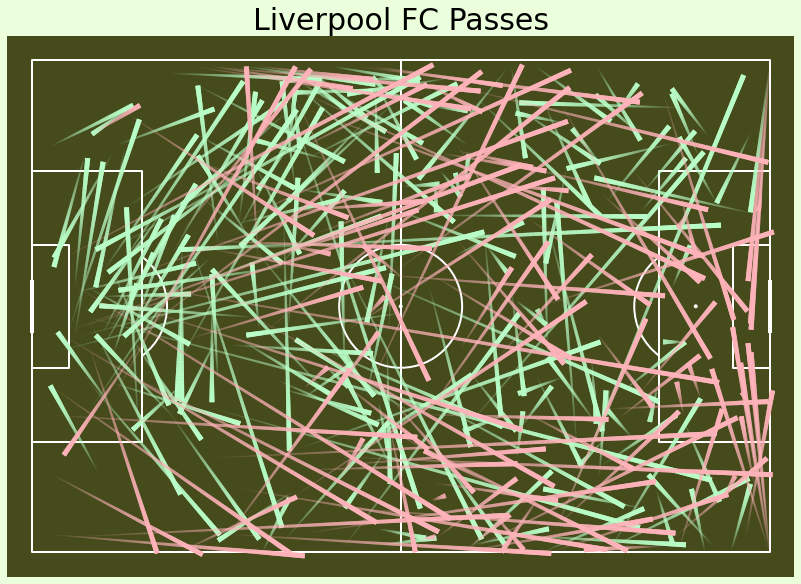

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#454B1B', line_color='#FFFFFF')
fig, ax = pitch.draw(figsize=(13, 8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#ECFFDC')

ax.set_title(f'Liverpool FC Passes', fontsize=30, color='#000000')

livComp = pitch.lines(liv_pass[liv_complete].x, liv_pass[liv_complete].y,
  liv_pass[liv_complete].end_x, liv_pass[liv_complete].end_y,
  lw=5, transparent=True, comet=True,
  color='#baffc9', ax=ax)

livO = pitch.lines(liv_pass[~liv_complete].x, liv_pass[~liv_complete].y,
                  liv_pass[~liv_complete].end_x, liv_pass[~liv_complete].end_y,
                  lw=5, transparent=True, comet=True,
                  color='#ffb3ba', ax=ax)

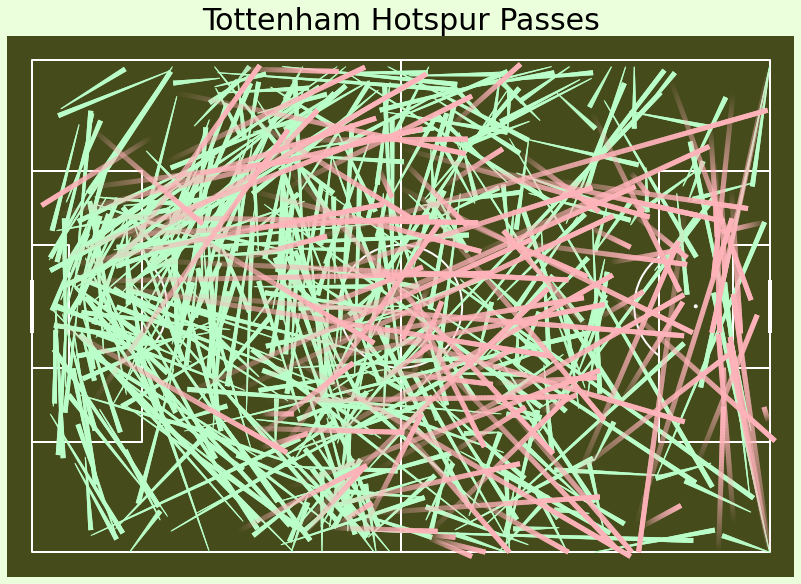

In [ ]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#454B1B', line_color='#FFFFFF')
fig, ax = pitch.draw(figsize=(13, 8), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#ECFFDC')

ax.set_title(f'Tottenham Hotspur Passes', fontsize=30, color='#000000')

c1 = pitch.lines(tot_pass[tot_complete].x, tot_pass[tot_complete].y,
  tot_pass[tot_complete].end_x, tot_pass[tot_complete].end_y, comet=True, color='#baffc9', ax=ax)

lc2 = pitch.lines(tot_pass[~tot_complete].x, tot_pass[~tot_complete].y, tot_pass[~tot_complete]. end_x, tot_pass[~tot_complete].end_y, color='#ffb3ba',ax=ax, transparent=True)
